## TunSwitch Dataset

### Infos on the old/original dataset before added columns

In [1]:
import pandas as pd
df_train = pd.read_csv('data/train.csv')

In [2]:
print(df_train.head())

                  ID                            wav  \
0   11_15:19_g6j.wav   audio_files/11_15:19_g6j.wav   
1   80_15:03_vsh.wav   audio_files/80_15:03_vsh.wav   
2  136_01:37_y9b.wav  audio_files/136_01:37_y9b.wav   
3   21_00:23_ss0.wav   audio_files/21_00:23_ss0.wav   
4   43_21:04_cxx.wav   audio_files/43_21:04_cxx.wav   

                                                 wrd  duration  
0  اسمي يمينة واخترت هذه الصورة لاني جزائرية و اق...      8.58  
1  وضحونا أمورنا على الاقل لجيل كامل قادم للتعليق...      8.64  
2                   فماشي حوانيت شاملة قريبة مه هوني      4.26  
3                 فما بارشا عباد في الرحلات السياحية      2.52  
4        شركة الطيران باش تدفعلي شراء حوايجي الشخصية      3.66  


In [5]:
print(df_train.shape)
print(df_train.columns)

(2128, 4)
Index(['ID', 'wav', 'wrd', 'duration'], dtype='object')


In [24]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2128 non-null   object 
 1   wav       2128 non-null   object 
 2   wrd       2128 non-null   object 
 3   duration  2128 non-null   float64
dtypes: float64(1), object(3)
memory usage: 66.6+ KB
None


In [19]:
for col in df_train.columns:
    print(f"Column {col}: Unique Values: {df_train[col].nunique()}")
    print(f"Missing values in {col}:", df_train[col].isna().sum())
    print('==============')

Column ID: Unique Values: 2128
Missing values in ID: 0
Column wav: Unique Values: 2128
Missing values in wav: 0
Column wrd: Unique Values: 2128
Missing values in wrd: 0
Column duration: Unique Values: 156
Missing values in duration: 0


In [25]:
print(df_train.describe())

          duration
count  2128.000000
mean      4.215115
std       2.128777
min       0.240000
25%       2.640000
50%       3.840000
75%       5.580000
max      40.440000


In [28]:
mean_value = df_train['duration'].mean()
values_below_mean = df_train[df_train['duration'] < mean_value]['duration'].count()
total_values = df_train['duration'].count()
percentage_below_mean = (values_below_mean / total_values) * 100
print(f"Percentage of values LESS than the mean in {'duration'}: {percentage_below_mean:.2f}%")
print('==============')
print(f"Percentage of values MORE than the mean in {'duration'}: {(100 - percentage_below_mean):.2f}%")

Percentage of values LESS than the mean in duration: 55.08%
Percentage of values MORE than the mean in duration: 44.92%


In [29]:
mean_value = 30
values_below_mean = df_train[df_train['duration'] < mean_value]['duration'].count()
total_values = df_train['duration'].count()
percentage_below_mean = (values_below_mean / total_values) * 100
print(f"Percentage of values LESS than the mean in {'duration'}: {percentage_below_mean:.2f}%")
print('==============')
print(f"Percentage of values MORE than the mean in {'duration'}: {(100 - percentage_below_mean):.2f}%")

Percentage of values LESS than the mean in duration: 99.95%
Percentage of values MORE than the mean in duration: 0.05%


In [37]:
selected_rows = df_train[df_train['duration'] >= 30]
indices = selected_rows.index.tolist()
print(f'There is {len(indices)} row(s) with duration >= 30, located at: {indices}')

There is 1 row(s) with duration >= 30, located at: [952]


In [45]:
import os
processed_segments_folder = 'data/processed_segments'
transcripts_folder = os.path.join(processed_segments_folder, 'transcripts')

for index, row in df_train.iterrows():
    file_id = str(row['ID']).replace('.wav', '').replace(':', '_')
    
    wrd_content = str(row['wrd'])
    
    txt_file_path = os.path.join(transcripts_folder, f"{file_id}.txt")
    
    with open(txt_file_path, 'w', encoding='utf-8') as f:
        f.write(wrd_content)

file_count = len([f for f in os.listdir(transcripts_folder) if os.path.isfile(os.path.join(transcripts_folder, f))])
print(f"Transcripts saved correctly in {transcripts_folder} and the number of files is: {file_count}")

Transcripts saved correctly in data/processed_segments\transcripts and the number of files is: 2128


In [51]:
audio_files_folder = 'data/processed_segments/audio_files'
file_count = len([f for f in os.listdir(audio_files_folder) if os.path.isfile(os.path.join(audio_files_folder, f))])
print(f"Transcripts saved correctly in {audio_files_folder} and the number of files is: {file_count}")

Transcripts saved correctly in data/processed_segments/audio_files and the number of files is: 2240


In [ ]:
import os
import shutil

transcripts_folder = 'data/processed_segments/transcripts'
audio_files_folder = 'data/processed_segments/audio_files'
audio_testing_folder = 'data/audio_testing'

transcript_ids = {f.replace('.txt', '') for f in os.listdir(transcripts_folder) if f.endswith('.txt')}
audio_files = [f for f in os.listdir(audio_files_folder) if f.endswith('.wav')]

training_count = 0
testing_count = 0
for audio_file in audio_files:
    # Get the audio file ID (remove .wav and replace colons with underscores)
    audio_id = audio_file.replace('.wav', '').replace(':', '_')
    
    if audio_id in transcript_ids:
        training_count += 1
    else:      
        source_path = os.path.join(audio_files_folder, audio_file)
        dest_path = os.path.join(audio_testing_folder, audio_file)
        shutil.move(source_path, dest_path)
        testing_count += 1

print(f"Summary:")
print(f"Training audio files kept in {audio_files_folder}: {training_count}")
print(f"Testing audio files moved to {audio_testing_folder}: {testing_count}")

Summary:
Training audio files kept in data/processed_segments/audio_files: 2128
Testing audio files moved to data/audio_testing: 112


In [53]:
dev_df = pd.read_csv('data/dev.csv')

audio_files = [f for f in os.listdir(audio_files_folder) if f.endswith('.wav')] if os.path.exists(audio_files_folder) else []
audio_testing = [f for f in os.listdir(audio_testing_folder) if f.endswith('.wav')] if os.path.exists(audio_testing_folder) else []

audio_files_set = set(audio_files)
audio_testing_set = set(audio_testing)

in_audio_files = 0
in_audio_testing = 0
not_found = 0
results = []
for index, row in dev_df.iterrows():

    audio_id_normalized = str(row['ID']).replace('.wav', '').replace(':', '_')
    audio_id_for_comparison = audio_id_normalized.replace('_', ':') + '.wav'
    
    if audio_id_for_comparison in audio_files_set:
        results.append(f"{audio_id_for_comparison}: Found in {audio_files_folder} (training)")
        in_audio_files += 1
    elif audio_id_for_comparison in audio_testing_set:
        results.append(f"{audio_id_for_comparison}: Found in {audio_testing_folder} (testing)")
        in_audio_testing += 1
    else:
        results.append(f"{audio_id_for_comparison}: Not found in either folder")
        not_found += 1


print(f"Summary:")
print(f"Audio files in {audio_files_folder} (training): {in_audio_files}")
print(f"Audio files in {audio_testing_folder} (testing): {in_audio_testing}")
print(f"Audio files not found in either folder: {not_found}")

Summary:
Audio files in data/processed_segments/audio_files (training): 0
Audio files in data/audio_testing (testing): 0
Audio files not found in either folder: 67


In [57]:
all_text = ' '.join(df_train['wrd'].astype(str))
words = all_text.split()
nan_count = words.count('nan')
print(f"Total nan words: {nan_count}")
if nan_count > 0:
    print(f"Found {nan_count} 'nan' strings in the word list, removing them.")
    words = [word for word in words if word != 'nan']
unique_words = set(words)
print(f"Total number of words (after removing 'nan'): {len(words)}")
print(f"Number of unique words: {len(unique_words)}")
print(f"Unique words: {unique_words}")

Total nan words: 0
Total number of words (after removing 'nan'): 17683
Number of unique words: 6615
Unique words: {'للشباب', 'المكتوب', 'حجزك', 'اثناش', 'وشكون', 'تاتفهم', 'براغتون', 'ثورة', 'القطن', 'الخطر', 'دبر', 'غلة', 'متحدين', 'للاصلاح', 'دراسته', 'الكرم', 'الليسونس', 'موتتها', 'بسوم', 'ضل', 'تهضمهمش', 'الببيت', 'السخانة', 'همه', 'بالمقلوب', 'قريتوهم', 'نكمنديو', 'فقد', 'أني', 'الضاحية', 'لادنبرة', 'متع', 'دورها', 'الملح', 'ذلك', 'جمبو', 'طوا', 'رايكم', 'للبحر', 'بالي', 'الحالي', 'تعدي', 'المطعم', 'تحديدا', 'ساوث', 'بمية', 'تقدمها', 'يفطروا', 'نسهروا', 'مكانش', 'بالحديث', 'وصغارها', 'بقداش', 'نكره', 'تلوات', 'فهم', 'الذيوبة', 'المينو', 'فساد', 'تخاف', 'بالامان', 'نكرهم', 'نحسوه', 'ماشية', 'ملفاتي', 'اذهب', 'غيري', 'مقتبل', 'داخل', 'صطمبالي', 'طحان', 'الوالد', 'الظروف', 'المالية', 'لولاية', 'والكلمة', 'الجزائر', 'التوالات', 'خلي', 'كشكول', 'كويس', 'والثنية', 'أخر', 'قشرتها', 'والتوانسة', 'نتعدا', 'تكسي', 'نساووه', 'هيستيريا', 'غري', 'منه', 'لصحابي', 'حالة', 'سفيرها', 'هنا', 'يستغر

### Infos on the new dataset after added columns

In [1]:
import pandas as pd
df_train = pd.read_csv('data/train.csv')

In [2]:
print(df_train.head())

                  ID                            wav  \
0   11_15:19_g6j.wav   audio_files/11_15:19_g6j.wav   
1   80_15:03_vsh.wav   audio_files/80_15:03_vsh.wav   
2  136_01:37_y9b.wav  audio_files/136_01:37_y9b.wav   
3   21_00:23_ss0.wav   audio_files/21_00:23_ss0.wav   
4   43_21:04_cxx.wav   audio_files/43_21:04_cxx.wav   

                                                 wrd  duration gender  \
0  اسمي يمينة واخترت هذه الصورة لاني جزائرية و اق...      8.58   male   
1  وضحونا أمور على الاقل جيل كامل قادم للتعليق عل...      8.64   male   
2                   فماشي حوانيت شاملة قريبة من هوني      4.26   male   
3                      برشا عباد في الرحلات السياحية      2.52   male   
4        شركة الطيران باش تدفعلي شراء حوايجي الشخصية      3.66   male   

      clarity background_noise      register speaking_rate accent age_voice  
0   stuttered           indoor   spontaneous      moderate     no     adult  
1       clear           indoor   spontaneous          slow     no     youn

In [3]:
print(df_train.shape)
print(df_train.columns)

(2128, 11)
Index(['ID', 'wav', 'wrd', 'duration', 'gender', 'clarity', 'background_noise',
       'register', 'speaking_rate', 'accent', 'age_voice'],
      dtype='object')


In [6]:
print(df_train.describe())

          duration
count  2128.000000
mean      4.215087
std       2.128793
min       0.240000
25%       2.640000
50%       3.840000
75%       5.580000
max      40.440000


In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2128 non-null   object 
 1   wav               2128 non-null   object 
 2   wrd               2128 non-null   object 
 3   duration          2128 non-null   float64
 4   gender            2119 non-null   object 
 5   clarity           2119 non-null   object 
 6   background_noise  2119 non-null   object 
 7   register          2119 non-null   object 
 8   speaking_rate     2119 non-null   object 
 9   accent            2119 non-null   object 
 10  age_voice         2119 non-null   object 
dtypes: float64(1), object(10)
memory usage: 183.0+ KB
None


In [5]:
for col in df_train.columns:
    print(f"Column {col}: Unique Values: {df_train[col].nunique()}")
    print(f"Missing values in {col}:", df_train[col].isna().sum())
    print('==============')

Column ID: Unique Values: 2128
Missing values in ID: 0
Column wav: Unique Values: 2128
Missing values in wav: 0
Column wrd: Unique Values: 2128
Missing values in wrd: 0
Column duration: Unique Values: 156
Missing values in duration: 0
Column gender: Unique Values: 6
Missing values in gender: 9
Column clarity: Unique Values: 4
Missing values in clarity: 9
Column background_noise: Unique Values: 6
Missing values in background_noise: 9
Column register: Unique Values: 4
Missing values in register: 9
Column speaking_rate: Unique Values: 5
Missing values in speaking_rate: 9
Column accent: Unique Values: 3
Missing values in accent: 9
Column age_voice: Unique Values: 4
Missing values in age_voice: 9


In [8]:
rows_with_missing = df_train[df_train.isna().any(axis=1)].index

print(rows_with_missing)

Index([803, 882, 998, 1378, 1442, 1499, 1751, 1758, 1997], dtype='int64')


In [9]:
for index in rows_with_missing:
    print(f"Row {index} has missing values:")
    print(df_train.iloc[index])
    print('==============')

Row 803 has missing values:
ID                              133_18:47_kyl.wav
wav                 audio_files/133_18:47_kyl.wav
wrd                                 ما عنديش فلوس
duration                                     2.04
gender                                        NaN
clarity                                       NaN
background_noise                              NaN
register                                      NaN
speaking_rate                                 NaN
accent                                        NaN
age_voice                                     NaN
Name: 803, dtype: object
Row 882 has missing values:
ID                              14_15:21_zyf.wav
wav                 audio_files/14_15:21_zyf.wav
wrd                               رسايل ليلي انا
duration                                    1.86
gender                                       NaN
clarity                                      NaN
background_noise                             NaN
register                  

When cleaning the data, I noticed that:
1. The audio of some rows are either empty or have the wrong transcription. I will proceed to delete them.
2. In Data Annotation step, I had some typos in the values of the new columns. I will normalize them.
3. Some of duration of audios are incorrect, I will verify that and change it.

#### Missing Values

In [10]:
df_train = df_train.dropna()

In [11]:
rows_with_missing = df_train[df_train.isna().any(axis=1)].index

print(rows_with_missing)

Index([], dtype='int64')


In [12]:
print(df_train.shape)
print(df_train.columns)

(2119, 11)
Index(['ID', 'wav', 'wrd', 'duration', 'gender', 'clarity', 'background_noise',
       'register', 'speaking_rate', 'accent', 'age_voice'],
      dtype='object')


#### Unique values

In [14]:
columns = ['gender', 'clarity', 'background_noise', 'register', 'speaking_rate', 'accent', 'age_voice']
for column in columns:
    unique_count = df_train[column].nunique()
    unique_values = df_train[column].unique().tolist()
    print(f"Column '{column}':")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}")

Column 'gender':
  Number of unique values: 6
  Unique values: [' male', ' female', 'male', ' male ', ' None', 'female']
Column 'clarity':
  Number of unique values: 4
  Unique values: [' stuttered', ' clear', ' None', 'stuttered']
Column 'background_noise':
  Number of unique values: 6
  Unique values: [' indoor', ' outdoor', ' None', ' outoor', 'outdoor', ' intdoor']
Column 'register':
  Number of unique values: 4
  Unique values: [' spontaneous', ' formal', ' reading', ' None']
Column 'speaking_rate':
  Number of unique values: 5
  Unique values: [' moderate', ' slow', ' fast', ' None', ' moderated']
Column 'accent':
  Number of unique values: 3
  Unique values: [' no', ' yes', ' None']
Column 'age_voice':
  Number of unique values: 4
  Unique values: [' adult', ' young', ' None', ' no']


In [16]:
df_train = df_train.replace(' male', 'male')
df_train = df_train.replace(' female', 'female')
df_train = df_train.replace(' stuttered', 'stuttered')
df_train = df_train.replace(' clear', 'clear')
df_train = df_train.replace(' indoor', 'indoor')
df_train = df_train.replace(' outdoor', 'outdoor')
df_train = df_train.replace(' outoor', 'outdoor')
df_train = df_train.replace(' spontaneous', 'spontaneous')
df_train = df_train.replace(' formal', 'formal')
df_train = df_train.replace(' reading', 'reading')
df_train = df_train.replace(' moderate', 'moderate')
df_train = df_train.replace(' slow', 'slow')
df_train = df_train.replace(' fast', 'fast')
df_train = df_train.replace(' yes', 'yes')
df_train = df_train.replace(' no', 'no')
df_train = df_train.replace(' adult', 'adult')
df_train = df_train.replace(' young', 'young')

In [17]:
columns = ['gender', 'clarity', 'background_noise', 'register', 'speaking_rate', 'accent', 'age_voice']
for column in columns:
    unique_count = df_train[column].nunique()
    unique_values = df_train[column].unique().tolist()
    print(f"Column '{column}':")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}")

Column 'gender':
  Number of unique values: 4
  Unique values: ['male', 'female', ' male ', ' None']
Column 'clarity':
  Number of unique values: 3
  Unique values: ['stuttered', 'clear', ' None']
Column 'background_noise':
  Number of unique values: 4
  Unique values: ['indoor', 'outdoor', ' None', ' intdoor']
Column 'register':
  Number of unique values: 4
  Unique values: ['spontaneous', 'formal', 'reading', ' None']
Column 'speaking_rate':
  Number of unique values: 5
  Unique values: ['moderate', 'slow', 'fast', ' None', ' moderated']
Column 'accent':
  Number of unique values: 3
  Unique values: ['no', 'yes', ' None']
Column 'age_voice':
  Number of unique values: 4
  Unique values: ['adult', 'young', ' None', 'no']


In [18]:
df_train = df_train.replace(' male ', 'male')
df_train = df_train.replace(' intdoor', 'outdoor')
df_train = df_train.replace(' moderated', 'moderate')

In [19]:
columns = ['gender', 'clarity', 'background_noise', 'register', 'speaking_rate', 'accent', 'age_voice']
for column in columns:
    unique_count = df_train[column].nunique()
    unique_values = df_train[column].unique().tolist()
    print(f"Column '{column}':")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}")

Column 'gender':
  Number of unique values: 3
  Unique values: ['male', 'female', ' None']
Column 'clarity':
  Number of unique values: 3
  Unique values: ['stuttered', 'clear', ' None']
Column 'background_noise':
  Number of unique values: 3
  Unique values: ['indoor', 'outdoor', ' None']
Column 'register':
  Number of unique values: 4
  Unique values: ['spontaneous', 'formal', 'reading', ' None']
Column 'speaking_rate':
  Number of unique values: 4
  Unique values: ['moderate', 'slow', 'fast', ' None']
Column 'accent':
  Number of unique values: 3
  Unique values: ['no', 'yes', ' None']
Column 'age_voice':
  Number of unique values: 4
  Unique values: ['adult', 'young', ' None', 'no']


In [25]:
df_train.to_csv("new_train.csv", index=False)

In [26]:
import pandas as pd
df = pd.read_csv('new_train.csv')

In [29]:
df.loc[df['age_voice'] == 'no', 'age_voice'] = 'adult'

In [31]:
columns = ['gender', 'clarity', 'background_noise', 'register', 'speaking_rate', 'accent', 'age_voice']
for column in columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique().tolist()
    print(f"Column '{column}':")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}")

Column 'gender':
  Number of unique values: 3
  Unique values: ['male', 'female', ' None']
Column 'clarity':
  Number of unique values: 3
  Unique values: ['stuttered', 'clear', ' None']
Column 'background_noise':
  Number of unique values: 3
  Unique values: ['indoor', 'outdoor', ' None']
Column 'register':
  Number of unique values: 4
  Unique values: ['spontaneous', 'formal', 'reading', ' None']
Column 'speaking_rate':
  Number of unique values: 4
  Unique values: ['moderate', 'slow', 'fast', ' None']
Column 'accent':
  Number of unique values: 3
  Unique values: ['no', 'yes', ' None']
Column 'age_voice':
  Number of unique values: 3
  Unique values: ['adult', 'young', ' None']


In [36]:
df = df.replace(' None', 'None')

In [37]:
rows_with_none = df[df.eq('None').any(axis=1)]
print("Rows where any column has the value 'None':")
print(rows_with_none)

Rows where any column has the value 'None':
                    ID                            wav  \
46   112_23:28_ewl.wav  audio_files/112_23:28_ewl.wav   
205  139_18:48_nnv.wav  audio_files/139_18:48_nnv.wav   
289    2_11:14_hr1.wav    audio_files/2_11:14_hr1.wav   

                                                   wrd  duration gender  \
46                                   من ثلاثين الف يان      0.42   None   
205  والسومرية ونتعلم اللغة الارامية والكتابة الهير...      5.94   None   
289                         عندي حجز اهو نومرو التأكيد      1.98   None   

    clarity background_noise register speaking_rate accent age_voice  
46     None             None     None          None   None      None  
205    None             None     None          None   None      None  
289    None             None     None          None   None      None  


In [44]:
rows_with_none = rows_with_none.index
df = df.drop(index=rows_with_none)

In [46]:
print(df.shape)
rows_with_none = df[df.eq('None').any(axis=1)]
print("Rows where any column has the value 'None':")
print(rows_with_none)

(2116, 11)
Rows where any column has the value 'None':
Empty DataFrame
Columns: [ID, wav, wrd, duration, gender, clarity, background_noise, register, speaking_rate, accent, age_voice]
Index: []


In [47]:
df.to_csv("new_train.csv", index=False)

#### Duration 

In [2]:
import pandas as pd
new_df = pd.read_csv('new_train.csv')

In [7]:
import librosa
import os

def get_wav_duration(file_path):
    print(f"Processing file: {file_path}")
    try:
        
        if os.path.exists(file_path):
            duration = librosa.get_duration(path=file_path)
            return duration
        else:
            print(f"File not found: {file_path}")
            return None
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

new_df['wav'] = new_df['wav'].str.replace(':', '_')
new_df['new_duration'] = new_df['wav'].apply(get_wav_duration)
print("DataFrame with new_duration column:")
print(new_df[['wav', 'duration', 'new_duration']])

Processing file: audio_files/11_15_19_g6j.wav


C:\Users\cyrine.anene_amaris\AppData\Local\Temp\ipykernel_27240\1314913692.py:9: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(path=file_path)


Processing file: audio_files/80_15_03_vsh.wav
Processing file: audio_files/136_01_37_y9b.wav
Processing file: audio_files/21_00_23_ss0.wav
Processing file: audio_files/43_21_04_cxx.wav
Processing file: audio_files/59_22_16_s3i.wav
Processing file: audio_files/61_09_16_mvg.wav
Processing file: audio_files/3_08_53_zn0.wav
Processing file: audio_files/8_10_37_2d2.wav
Processing file: audio_files/115_00_21_tbz.wav
Processing file: audio_files/39_21_13_frb.wav
Processing file: audio_files/39_21_54_zv1.wav
Processing file: audio_files/60_23_14_aq9.wav
Processing file: audio_files/8_00_08_jzt.wav
Processing file: audio_files/11_22_54_nnt.wav
Processing file: audio_files/89_19_07_ix1.wav
Processing file: audio_files/147_01_41_lhn.wav
Processing file: audio_files/152_01_42_43b.wav
Processing file: audio_files/40_14_21_o5s.wav
Processing file: audio_files/132_01_36_4ub.wav
Processing file: audio_files/60_11_15_7uf.wav
Processing file: audio_files/6_00_54_g3j.wav
Processing file: audio_files/76_0

In [9]:
print(set(new_df['new_duration']))

{0.0, 2.8, 3.6, 4.3, 5.9, 2.9, 3.8, 5.1, 4.6, 4.7, 8.9, 3.1, 5.2, 7.6, 6.1, 9.3, 10.3, 13.9, 12.0, 3.0, 4.4, 4.9, 4.1, 4.5, 3.5, 5.0, 5.6, 6.0, 6.9, 6.4, 6.5, 6.6, 7.1, 7.9, 7.4, 8.0, 8.7, 2.1, 8.5, 2.6, 8.2, 8.3, 9.0, 9.8, 10.2, 2.3, 2.7, 3.7, 3.2, 4.8, 5.8, 5.3, 5.7, 6.8, 6.7, 6.2, 7.3, 7.8, 7.7, 7.2, 2.4, 3.4}


In [8]:
tolerance = 0.01  # Adjust tolerance as needed
mismatches = new_df[abs(new_df['duration'] - new_df['new_duration']) > tolerance]
mismatch_count = len(mismatches)
print(f"\nNumber of rows where duration differs from new_duration: {mismatch_count}")
if mismatch_count > 0:
    print("\nRows with differing durations:")
    print(mismatches[['wav', 'duration', 'new_duration']])


Number of rows where duration differs from new_duration: 2116

Rows with differing durations:
                                wav  duration  new_duration
0      audio_files/11_15_19_g6j.wav      8.58           0.0
1      audio_files/80_15_03_vsh.wav      8.64           0.0
2     audio_files/136_01_37_y9b.wav      4.26           0.0
3      audio_files/21_00_23_ss0.wav      2.52           0.0
4      audio_files/43_21_04_cxx.wav      3.66           0.0
...                             ...       ...           ...
2111    audio_files/4_11_49_n7h.wav      2.58           0.0
2112    audio_files/6_15_02_jjj.wav      2.16           0.0
2113   audio_files/75_11_21_ij8.wav      2.34           0.0
2114   audio_files/41_12_59_r1v.wav      2.88           0.0
2115   audio_files/24_22_04_f47.wav      9.30           0.0

[2116 rows x 3 columns]


In [10]:
mean_value = new_df['new_duration'].mean()
values_below_mean = new_df[new_df['new_duration'] < mean_value]['new_duration'].count()
total_values = new_df['new_duration'].count()
percentage_below_mean = (values_below_mean / total_values) * 100
print(f"Percentage of values LESS than the mean in {'new_duration'}: {percentage_below_mean:.2f}%")
print('==============')
print(f"Percentage of values MORE than the mean in {'new_duration'}: {(100 - percentage_below_mean):.2f}%")

Percentage of values LESS than the mean in new_duration: 94.90%
Percentage of values MORE than the mean in new_duration: 5.10%


#### Stats

Pie charts saved to: pie_charts.png


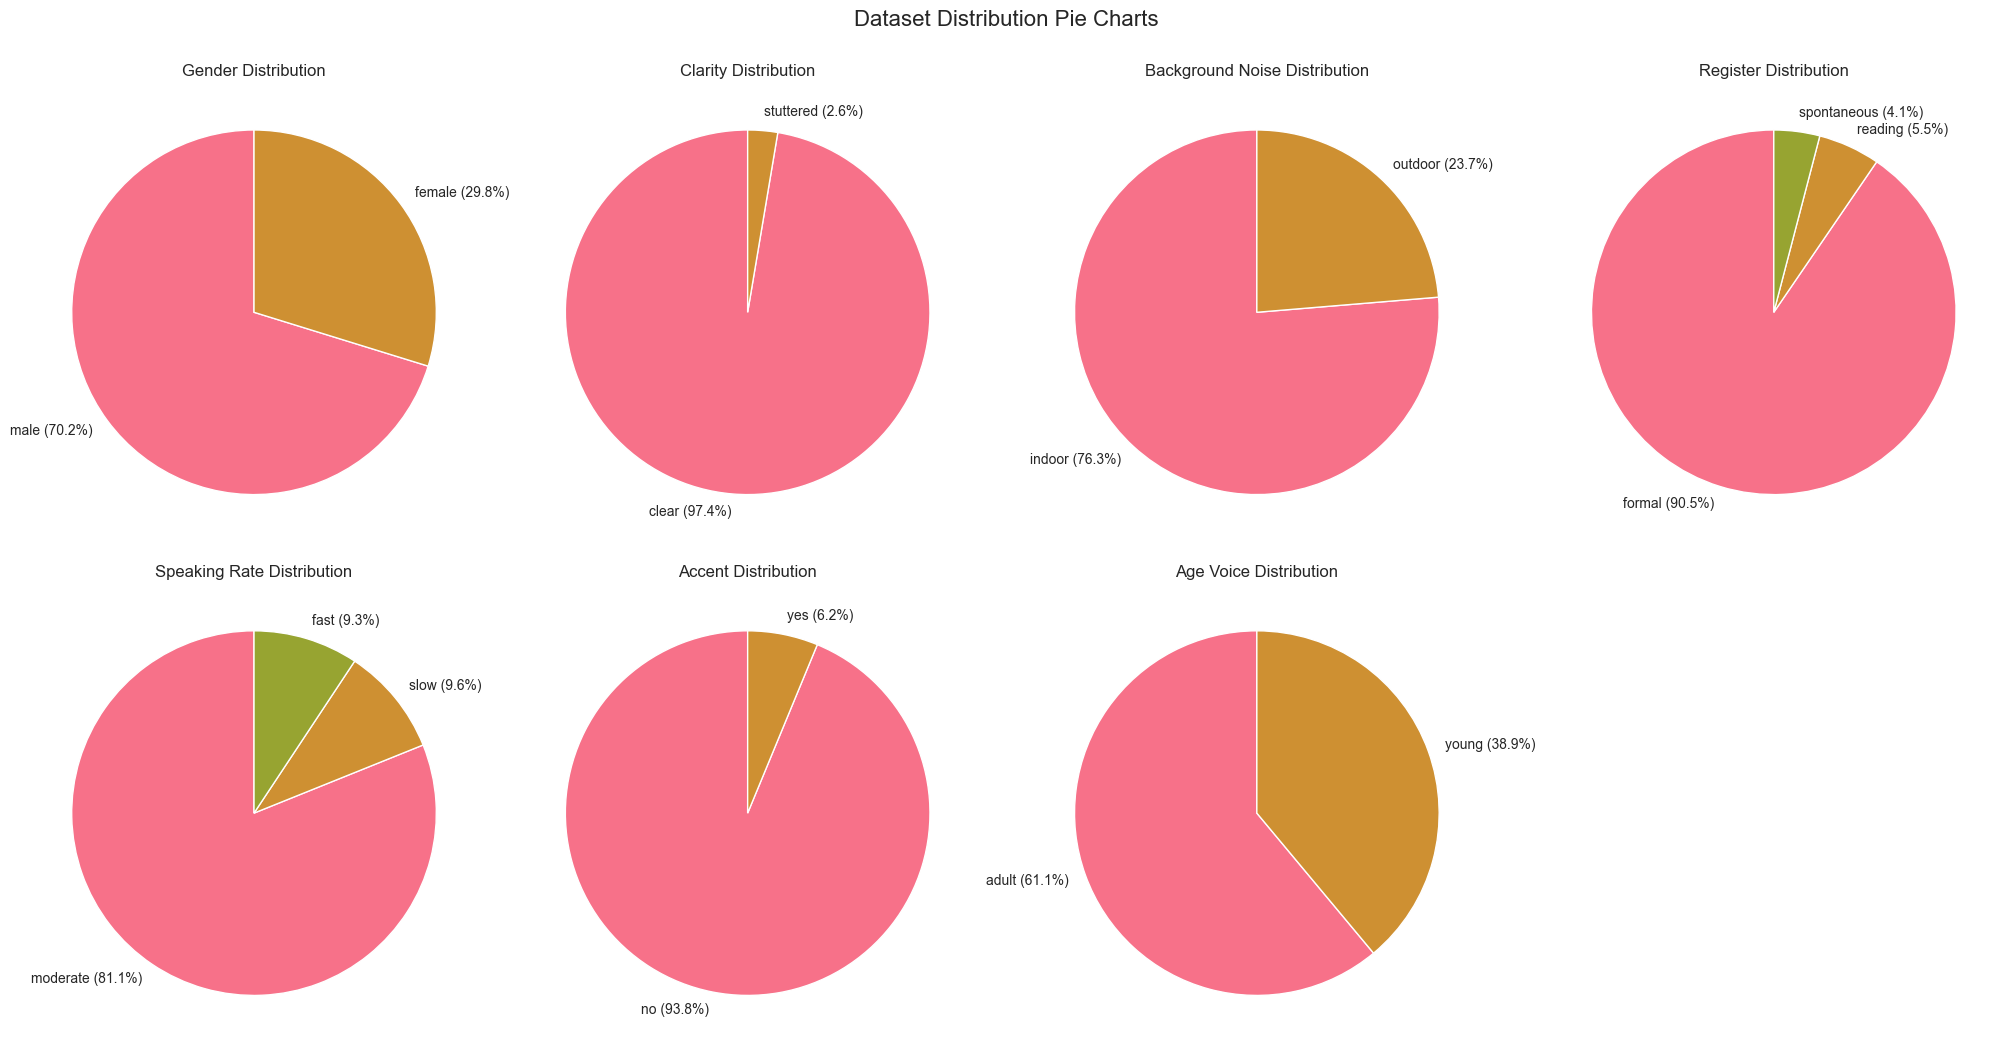

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def generate_pie_charts(dataset_path, output_image="pie_charts.png"):
    """
    Generate pie charts for specified columns in a dataset using Seaborn and Matplotlib.
    
    Args:
        dataset_path (str): Path to the input CSV dataset.
        output_image (str): Path to save the output image file with pie charts.
    """
    # Columns to generate pie charts for
    columns = ['gender', 'clarity', 'background_noise', 'register', 'speaking_rate', 'accent', 'age_voice']
    
    # Read the dataset
    df = pd.read_csv(dataset_path)
    
    # Check if all required columns exist
    missing_cols = [col for col in columns if col not in df.columns]
    
    # Set Seaborn style for better aesthetics
    sns.set_style("whitegrid")
    
    # Create a figure with subplots (2 rows, 4 columns to accommodate 7 charts)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), constrained_layout=True)
    axes = axes.flatten()  # Flatten to easily iterate over axes
    
    # Define a color palette (Seaborn's default palette, works for light/dark themes)
    colors = sns.color_palette("husl", 8)  # Use 'husl' for distinct, vibrant colors
    
    # Generate pie chart for each column
    for idx, col in enumerate(columns):
        # Get value counts and percentages
        value_counts = df[col].value_counts()
        total = len(df)
        labels = [f"{val} ({(count/total*100):.1f}%)" for val, count in value_counts.items()]
        counts = value_counts.values
        
        # Create pie chart
        axes[idx].pie(counts, labels=labels, colors=colors[:len(counts)], autopct=None, startangle=90)
        axes[idx].set_title(f"{col.replace('_', ' ').title()} Distribution", fontsize=12)
    
    # Hide the last subplot (if unused, since we have 7 columns and 8 subplots)
    if len(columns) < len(axes):
        axes[-1].set_visible(False)
    
    # Add a main title
    fig.suptitle("Dataset Distribution Pie Charts", fontsize=16, y=1.05)
    
    # Save the plot to a file
    plt.savefig(output_image, dpi=300, bbox_inches='tight')
    print(f"Pie charts saved to: {output_image}")
    
    # Optionally display the plot (comment out if running non-interactively)
    plt.show()
    
    # Close the plot to free memory
    plt.close()

generate_pie_charts('new_train.csv', output_image="pie_charts.png")

In [15]:
df= pd.read_csv('new_train.csv')
df.drop(columns=['gender','clarity','background_noise','register','speaking_rate','accent','age_voice'], inplace=True, errors='ignore')
df.to_csv('train_original.csv', index=False)

### Global Dataset

In [16]:
df1 = pd.read_csv('data/test.csv')

In [17]:
df1.columns

Index(['Unnamed: 0', 'ID', 'wav', 'wrd', 'duration'], dtype='object')

In [19]:
df1.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

In [20]:
df1.columns

Index(['ID', 'wav', 'wrd', 'duration'], dtype='object')

In [26]:
def update_wav_paths(df, output_path, rename_files=False):
    """
    Update the 'wav' column paths in a dataset from /gpfsscratch/rech/nou/uzn19yk/annotation_tool/ to audio_testing/
    and optionally rename the corresponding audio files on the file system.
    
    Args:
        dataset_path (str): Path to the input CSV dataset.
        output_path (str, optional): Path to save the updated dataset. If None, overwrites the input file.
        rename_files (bool): Whether to rename the actual audio files to the new paths.
    """
   
    # Define old and new directory paths
    old_dir = "/gpfsscratch/rech/nou/uzn19yk/annotation_tool/"
    new_dir = "audio_testing/"
    
    # Ensure the new directory exists
    if rename_files and not os.path.exists(new_dir):
        os.makedirs(new_dir)
    
    # Update the 'wav' column paths
    df['wav'] = df['wav'].str.replace(old_dir, new_dir, regex=False)
    
    # Save the updated dataset
    df.to_csv(output_path, index=False)
    print(f"Updated dataset saved to: {output_path}")
    
    return df

df1 = update_wav_paths(df1, 'test_updated.csv', rename_files=False)

Updated dataset saved to: test_updated.csv


In [29]:
import pandas as pd
import os
import glob

def verify_and_filter_audio_files(dataset_path, audio_testing_dir="data/audio_testing/", global_dir="global/", processed_dir="data/processed_segments/audio_files/", output_report="verification_report.csv", filtered_dataset_path="filtered_test_updated.csv"):
    """
    Verify that each audio file in audio_testing/ meets three conditions:
    1. Exists in global/
    2. Does not exist in data/processed_segments/audio_files/
    3. Exists in the 'wav' column of the dataset.
    Save rows from the dataset where audio files meet all conditions to a separate CSV.
    
    Args:
        dataset_path (str): Path to the input CSV dataset (e.g., test_updated.csv).
        audio_testing_dir (str): Directory containing audio files to verify.
        global_dir (str): Directory to check for file existence.
        processed_dir (str): Directory to check for file non-existence.
        output_report (str): Path to save the verification report CSV.
        filtered_dataset_path (str): Path to save the filtered dataset CSV.
    
    Returns:
        tuple: (verification_report_df, filtered_df) - Verification report and filtered dataset.
    """
    # Ensure directories end with a slash
    audio_testing_dir = audio_testing_dir.rstrip("/") + "/"
    global_dir = global_dir.rstrip("/") + "/"
    processed_dir = processed_dir.rstrip("/") + "/"
    
    # Read the dataset
    try:
        df = pd.read_csv(dataset_path)
    except FileNotFoundError:
        print(f"Error: Dataset file not found at {dataset_path}")
        return None, None
    
    # Check if 'wav' column exists
    if 'wav' not in df.columns:
        print("Error: Dataset must contain a 'wav' column.")
        return None, None
    
    # Get list of audio files in audio_testing/
    audio_files = glob.glob(audio_testing_dir + "*.wav")
    if not audio_files:
        print(f"No WAV files found in {audio_testing_dir}")
        return None, None
    
    # Extract just the file names from audio_testing/ for comparison
    audio_file_names = [os.path.basename(f) for f in audio_files]
    
    # Get list of file names from the dataset's wav column
    dataset_file_names = [os.path.basename(path) for path in df['wav'].dropna()]
    
    # Initialize report list
    report_data = []
    valid_audio_files = []
    
    # Verify each audio file
    for audio_file in audio_file_names:
        # Initialize verification results
        in_global = False
        not_in_processed = True
        in_dataset = False
        issues = []
        
        # Condition 1: Check if file exists in global/
        global_path = os.path.join(global_dir, audio_file)
        if os.path.exists(global_path):
            in_global = True
        else:
            issues.append(f"Missing in {global_dir}")
        
        # Condition 2: Check if file does NOT exist in data/processed_segments/audio_files/
        processed_path = os.path.join(processed_dir, audio_file)
        if os.path.exists(processed_path):
            not_in_processed = False
            issues.append(f"Unexpectedly found in {processed_dir}")
        
        # Condition 3: Check if file exists in dataset's wav column
        if audio_file in dataset_file_names:
            in_dataset = True
        else:
            issues.append("Missing in dataset wav column")
        
        # Determine if all conditions are met
        all_conditions_met = in_global and not_in_processed and in_dataset
        if all_conditions_met:
            valid_audio_files.append(audio_file)
        
        # Add to report
        report_data.append({
            "audio_file": audio_file,
            "in_global": in_global,
            "not_in_processed": not_in_processed,
            "in_dataset": in_dataset,
            "all_conditions_met": all_conditions_met,
            "issues": "; ".join(issues) if issues else "None"
        })
    
    # Create verification report DataFrame
    report_df = pd.DataFrame(report_data)
    
    # Filter dataset rows where audio files meet all conditions
    filtered_df = df[df['wav'].apply(lambda x: os.path.basename(x) in valid_audio_files)]
    
    # Print summary
    print("\nVerification Report:")
    print(f"Total files checked: {len(audio_files)}")
    print(f"Files meeting all conditions: {len(report_df[report_df['all_conditions_met'] == True])}")
    print(f"Files with issues: {len(report_df[report_df['all_conditions_met'] == False])}")
    print(f"Filtered dataset rows: {len(filtered_df)}")
    print("\nDetailed Results:")
    for _, row in report_df.iterrows():
        print(f"File: {row['audio_file']}")
        print(f"  In global/: {row['in_global']}")
        print(f"  Not in processed/: {row['not_in_processed']}")
        print(f"  In dataset: {row['in_dataset']}")
        print(f"  All conditions met: {row['all_conditions_met']}")
        print(f"  Issues: {row['issues']}\n")
    
    # Save verification report
    report_df.to_csv(output_report, index=False)
    print(f"Verification report saved to: {output_report}")
    
    # Save filtered dataset
    if not filtered_df.empty:
        filtered_df.to_csv(filtered_dataset_path, index=False)
        print(f"Filtered dataset saved to: {filtered_dataset_path}")
    else:
        print("No rows meet all conditions; no filtered dataset saved.")
    
    return report_df, filtered_df

report_df, filtered_df = verify_and_filter_audio_files('test_updated.csv', audio_testing_dir="data/audio_testing/", global_dir="global/", processed_dir="data/processed_segments/audio_files/", output_report="verification_report.csv")


Verification Report:
Total files checked: 112
Files meeting all conditions: 45
Files with issues: 67
Filtered dataset rows: 45

Detailed Results:
File: 105_15_07_3vr.wav
  In global/: True
  Not in processed/: True
  In dataset: True
  All conditions met: True
  Issues: None

File: 107_22_20_njy.wav
  In global/: True
  Not in processed/: True
  In dataset: False
  All conditions met: False
  Issues: Missing in dataset wav column

File: 109_00_19_stp.wav
  In global/: True
  Not in processed/: True
  In dataset: False
  All conditions met: False
  Issues: Missing in dataset wav column

File: 10_20_33_l7b.wav
  In global/: True
  Not in processed/: True
  In dataset: True
  All conditions met: True
  Issues: None

File: 110_22_30_e3o.wav
  In global/: True
  Not in processed/: True
  In dataset: False
  All conditions met: False
  Issues: Missing in dataset wav column

File: 11_00_09_9wd.wav
  In global/: True
  Not in processed/: True
  In dataset: False
  All conditions met: False
  

In [21]:
df2=pd.read_csv('train_original.csv')

In [22]:
df2.columns

Index(['ID', 'wav', 'wrd', 'duration'], dtype='object')

In [30]:
def merge_datasets(df1, df2, output_path):
    """
    Merge two CSV datasets and save the result to a new CSV file.
    
    Args:
        path1 (str): Path to the first CSV dataset.
        path2 (str): Path to the second CSV dataset.
        output_path (str): Path to save the merged dataset.
    """

    # Concatenate the two DataFrames
    merged_df = pd.concat([df1, df2], ignore_index=True)
    
    # Save the merged DataFrame to a new CSV file
    merged_df.to_csv(output_path, index=False)
    print(f"Merged dataset saved to: {output_path}")

merge_datasets(filtered_df, df2, 'merged_dataset.csv')

Merged dataset saved to: merged_dataset.csv


In [33]:
def update_wav_paths(df, output_path, rename_files=False):
    """
    Update the 'wav' column paths in a dataset from /gpfsscratch/rech/nou/uzn19yk/annotation_tool/ to audio_testing/
    and optionally rename the corresponding audio files on the file system.
    
    Args:
        dataset_path (str): Path to the input CSV dataset.
        output_path (str, optional): Path to save the updated dataset. If None, overwrites the input file.
        rename_files (bool): Whether to rename the actual audio files to the new paths.
    """
   
    # Define old and new directory paths
    old_dir = "audio_testing/"
    old_dir1 = "audio_files/"
    new_dir = "data/audio_testing/"
    new_dir1 = "data/processed_segments/audio_files/"
    
    # Ensure the new directory exists
    if rename_files and not os.path.exists(new_dir):
        os.makedirs(new_dir)
    
    # Update the 'wav' column paths
    df['wav'] = df['wav'].str.replace(old_dir, new_dir, regex=False)
    df['wav'] = df['wav'].str.replace(old_dir1, new_dir1, regex=False)
    df['wav'] = df['wav'].str.replace(':', '_', regex=False)
    df['ID'] = df['ID'].str.replace(':', '_', regex=False)

    # Save the updated dataset
    df.to_csv(output_path, index=False)
    print(f"Updated dataset saved to: {output_path}")
    
    return df

df3 = pd.read_csv('merged_dataset.csv')
df3 = update_wav_paths(df3, 'merged_updated.csv', rename_files=False)

Updated dataset saved to: merged_updated.csv


In [37]:
def verify_and_filter_dev(dataset_path, global_dir="global/", output_dataset="dev_updated.csv", output_report="verification_report_dev.csv"):
    """
    Verify if each audio file in the 'wav' column of dev.csv exists in global/.
    Save rows where the audio file exists to dev_updated.csv and generate a verification report.
    
    Args:
        dataset_path (str): Path to the input CSV dataset (e.g., dev.csv).
        global_dir (str): Directory to check for audio file existence.
        output_dataset (str): Path to save the filtered dataset CSV.
        output_report (str): Path to save the verification report CSV.
    
    Returns:
        tuple: (verification_report_df, filtered_df) - Verification report and filtered dataset.
    """
    # Ensure global_dir ends with a slash
    global_dir = global_dir.rstrip("/") + "/"
    
    # Read the dataset
    try:
        df = pd.read_csv(dataset_path)
    except FileNotFoundError:
        print(f"Error: Dataset file not found at {dataset_path}")
        return None, None
    
    # Check if 'wav' column exists
    if 'wav' not in df.columns:
        print("Error: Dataset must contain a 'wav' column.")
        return None, None
    
    # Initialize report list
    report_data = []
    valid_audio_files = []
    df['wav'] = df['wav'].str.replace(':', '_', regex=False)
    # Verify each audio file in the wav column
    for index, row in df.iterrows():
        audio_file = os.path.basename(row['wav'])  # Extract file name (e.g., 11_15_19_g6j.wav)
        global_path = os.path.join(global_dir, audio_file)
        
        # Check if the file exists in global/
        exists_in_global = os.path.exists(global_path)
        
        # Add to report
        report_data.append({
            "audio_file": audio_file,
            "in_global": exists_in_global,
            "issues": "None" if exists_in_global else f"Missing in {global_dir}"
        })
        
        # Collect valid audio files
        if exists_in_global:
            valid_audio_files.append(audio_file)
    
    # Create verification report DataFrame
    report_df = pd.DataFrame(report_data)
    
    # Filter dataset rows where audio files exist in global/
    filtered_df = df[df['wav'].apply(lambda x: os.path.basename(x) in valid_audio_files)]
    
    # Print summary
    print("\nVerification Report:")
    print(f"Total rows checked: {len(df)}")
    print(f"Rows with audio files in global/: {len(filtered_df)}")
    print(f"Rows with audio files missing in global/: {len(df) - len(filtered_df)}")
    print("\nDetailed Results:")
    for _, row in report_df.iterrows():
        print(f"File: {row['audio_file']}")
        print(f"  In global/: {row['in_global']}")
        print(f"  Issues: {row['issues']}\n")
    
    # Save verification report
    report_df.to_csv(output_report, index=False)
    print(f"Verification report saved to: {output_report}")
    
    # Save filtered dataset
    if not filtered_df.empty:
        filtered_df.to_csv(output_dataset, index=False)
        print(f"Filtered dataset saved to: {output_dataset}")
    else:
        print("No rows have audio files in global/; no filtered dataset saved.")
    
    return report_df, filtered_df

report_dev_df, filtered_dev_df = verify_and_filter_dev('data/dev.csv', global_dir="global/", output_dataset="dev_updated.csv", output_report="verification_report_dev.csv")


Verification Report:
Total rows checked: 67
Rows with audio files in global/: 67
Rows with audio files missing in global/: 0

Detailed Results:
File: 20_22_00_mjr.wav
  In global/: True
  Issues: None

File: 62_02_19_quc.wav
  In global/: True
  Issues: None

File: 78_22_23_82f.wav
  In global/: True
  Issues: None

File: 31_21_52_s6d.wav
  In global/: True
  Issues: None

File: 123_15_09_go2.wav
  In global/: True
  Issues: None

File: 3_12_47_l7u.wav
  In global/: True
  Issues: None

File: 43_13_00_ymu.wav
  In global/: True
  Issues: None

File: 61_14_26_nq3.wav
  In global/: True
  Issues: None

File: 14_13_55_1r1.wav
  In global/: True
  Issues: None

File: 94_22_46_vrc.wav
  In global/: True
  Issues: None

File: 45_11_09_t8h.wav
  In global/: True
  Issues: None

File: 110_22_30_e3o.wav
  In global/: True
  Issues: None

File: 138_01_37_3oo.wav
  In global/: True
  Issues: None

File: 8_20_33_89m.wav
  In global/: True
  Issues: None

File: 29_21_51_ksu.wav
  In global/: True


In [38]:
def update_wav_paths(df, output_path, rename_files=False):
    """
    Update the 'wav' column paths in a dataset from /gpfsscratch/rech/nou/uzn19yk/annotation_tool/ to audio_testing/
    and optionally rename the corresponding audio files on the file system.
    
    Args:
        dataset_path (str): Path to the input CSV dataset.
        output_path (str, optional): Path to save the updated dataset. If None, overwrites the input file.
        rename_files (bool): Whether to rename the actual audio files to the new paths.
    """
   
    # Define old and new directory paths
    old_dir1 = "audio_files/"
    new_dir = "global/"
    
    # Ensure the new directory exists
    if rename_files and not os.path.exists(new_dir):
        os.makedirs(new_dir)
    
    # Update the 'wav' column paths
    df['wav'] = df['wav'].str.replace(old_dir1, new_dir, regex=False)
    df['wav'] = df['wav'].str.replace(':', '_', regex=False)
    df['ID'] = df['ID'].str.replace(':', '_', regex=False)

    # Save the updated dataset
    df.to_csv(output_path, index=False)
    print(f"Updated dataset saved to: {output_path}")
    
    return df

df4 = pd.read_csv('dev_updated.csv')
df4 = update_wav_paths(df4, 'dev_updated.csv', rename_files=False)

Updated dataset saved to: dev_updated.csv


In [39]:
df5 = pd.read_csv('merged_updated.csv')
merge_datasets(df4, df5, 'final_merged_dataset.csv')

Merged dataset saved to: final_merged_dataset.csv


In [41]:
import shutil
def copy_audio_files(dataset_path, output_dataset="dev_updated.csv", new_audio_dir="audio_files/", output_report="copy_report.csv"):
    """
    Copy audio files from paths in the 'wav' column to a new folder 'audio_files/' and update the dataset.
    
    Args:
        dataset_path (str): Path to the input CSV dataset (e.g., dev.csv).
        output_dataset (str): Path to save the updated dataset CSV.
        new_audio_dir (str): Directory to copy audio files to.
        output_report (str): Path to save the copy operation report CSV.
    
    Returns:
        tuple: (report_df, updated_df) - Copy report and updated dataset.
    """
    # Ensure new_audio_dir ends with a slash and create it if it doesn't exist
    new_audio_dir = new_audio_dir.rstrip("/") + "/"
    if not os.path.exists(new_audio_dir):
        os.makedirs(new_audio_dir)
    
    # Read the dataset
    try:
        df = pd.read_csv(dataset_path)
    except FileNotFoundError:
        print(f"Error: Dataset file not found at {dataset_path}")
        return None, None
    
    # Check if required columns exist
    if not all(col in df.columns for col in ['ID', 'wav', 'wrd', 'duration']):
        print("Error: Dataset must contain 'ID', 'wav', 'wrd', and 'duration' columns.")
        return None, None
    
    # Initialize report list
    report_data = []
    
    # Process each row
    for index, row in df.iterrows():
        audio_file = os.path.basename(row['wav'])  # Extract file name (e.g., 11_15_19_g6j.wav)
        source_path = row['wav']  # Full path (e.g., global/11_15_19_g6j.wav)
        dest_path = os.path.join(new_audio_dir, audio_file)  # New path (e.g., audio_files/11_15_19_g6j.wav)
        
        # Initialize report entry
        report_entry = {
            "audio_file": audio_file,
            "source_path": source_path,
            "destination_path": dest_path,
            "copied": False,
            "issues": ""
        }
        
        # Check if source file exists
        if os.path.exists(source_path):
            try:
                # Copy the file to audio_files/
                shutil.copy2(source_path, dest_path)
                report_entry["copied"] = True
                report_entry["issues"] = "None"
                # Update wav column
                df.at[index, 'wav'] = dest_path
            except OSError as e:
                report_entry["issues"] = f"Error copying file: {e}"
        else:
            report_entry["issues"] = f"Source file not found: {source_path}"
        
        report_data.append(report_entry)
    
    # Create report DataFrame
    report_df = pd.DataFrame(report_data)
    
    # Save updated dataset
    if not df.empty:
        df.to_csv(output_dataset, index=False)
        print(f"Updated dataset saved to: {output_dataset}")
    else:
        print("No rows to save; updated dataset not created.")
    
    # Save copy report
    report_df.to_csv(output_report, index=False)
    print(f"Copy report saved to: {output_report}")
    
    # Print summary
    print("\nCopy Operation Report:")
    print(f"Total files processed: {len(report_data)}")
    print(f"Files successfully copied: {len(report_df[report_df['copied'] == True])}")
    print(f"Files with issues: {len(report_df[report_df['copied'] == False])}")
    print("\nDetailed Results:")
    for _, row in report_df.iterrows():
        print(f"File: {row['audio_file']}")
        print(f"  Source: {row['source_path']}")
        print(f"  Destination: {row['destination_path']}")
        print(f"  Copied: {row['copied']}")
        print(f"  Issues: {row['issues']}\n")
    
    return report_df, df

report_copy_df, updated_df = copy_audio_files('final_merged_dataset.csv', output_dataset="1_final_merged_dataset.csv", new_audio_dir="audio_files/", output_report="copy_report.csv")

Updated dataset saved to: 1_final_merged_dataset.csv
Copy report saved to: copy_report.csv

Copy Operation Report:
Total files processed: 2228
Files successfully copied: 2228
Files with issues: 0

Detailed Results:
File: 20_22_00_mjr.wav
  Source: global/20_22_00_mjr.wav
  Destination: audio_files/20_22_00_mjr.wav
  Copied: True
  Issues: None

File: 62_02_19_quc.wav
  Source: global/62_02_19_quc.wav
  Destination: audio_files/62_02_19_quc.wav
  Copied: True
  Issues: None

File: 78_22_23_82f.wav
  Source: global/78_22_23_82f.wav
  Destination: audio_files/78_22_23_82f.wav
  Copied: True
  Issues: None

File: 31_21_52_s6d.wav
  Source: global/31_21_52_s6d.wav
  Destination: audio_files/31_21_52_s6d.wav
  Copied: True
  Issues: None

File: 123_15_09_go2.wav
  Source: global/123_15_09_go2.wav
  Destination: audio_files/123_15_09_go2.wav
  Copied: True
  Issues: None

File: 3_12_47_l7u.wav
  Source: global/3_12_47_l7u.wav
  Destination: audio_files/3_12_47_l7u.wav
  Copied: True
  Issues:

In [43]:
def extract_transcriptions(dataset_path, transcriptions_dir="transcriptions/", output_report="transcription_report.csv"):
    """
    Extract text from the 'wrd' column and save each as a .txt file in transcriptions_dir,
    named after the corresponding 'ID' column value.
    
    Args:
        dataset_path (str): Path to the input CSV dataset (e.g., dev.csv).
        transcriptions_dir (str): Directory to save transcription .txt files.
        output_report (str): Path to save the transcription report CSV.
    
    Returns:
        tuple: (report_df, None) - Transcription report and None (no modified dataset).
    """
    # Ensure transcriptions_dir ends with a slash and create it if it doesn't exist
    transcriptions_dir = transcriptions_dir.rstrip("/") + "/"
    if not os.path.exists(transcriptions_dir):
        os.makedirs(transcriptions_dir)
    
    # Read the dataset
    try:
        df = pd.read_csv(dataset_path)
    except FileNotFoundError:
        print(f"Error: Dataset file not found at {dataset_path}")
        return None, None
    
    # Check if required columns exist
    if not all(col in df.columns for col in ['ID', 'wrd']):
        print("Error: Dataset must contain 'ID' and 'wrd' columns.")
        return None, None
    
    # Initialize report list
    report_data = []
    
    # Process each row
    for index, row in df.iterrows():
        audio_id = row['ID']  
        text = row['wrd']  
        
        # Create text file name (replace .wav with .txt if necessary)
        txt_filename = audio_id.replace('.wav', '.txt') if audio_id.endswith('.wav') else f"{audio_id}.txt"
        txt_path = os.path.join(transcriptions_dir, txt_filename)
        
        # Initialize report entry
        report_entry = {
            "audio_id": audio_id,
            "txt_filename": txt_filename,
            "txt_path": txt_path,
            "saved": False,
            "issues": ""
        }
        
        # Save text to file
        try:
            with open(txt_path, 'w', encoding='utf-8') as f:
                f.write(str(text) if pd.notna(text) else "")
            report_entry["saved"] = True
            report_entry["issues"] = "None"
        except Exception as e:
            report_entry["issues"] = f"Error saving file: {e}"
        
        report_data.append(report_entry)
    
    # Create report DataFrame
    report_df = pd.DataFrame(report_data)
    
    # Save report
    report_df.to_csv(output_report, index=False)
    print(f"Transcription report saved to: {output_report}")
    
    # Print summary
    print("\nTranscription Report:")
    print(f"Total rows processed: {len(df)}")
    print(f"Text files successfully saved: {len(report_df[report_df['saved'] == True])}")
    print(f"Text files with issues: {len(report_df[report_df['saved'] == False])}")
    print("\nDetailed Results:")
    for _, row in report_df.iterrows():
        print(f"ID: {row['audio_id']}")
        print(f"  Text File: {row['txt_filename']}")
        print(f"  Path: {row['txt_path']}")
        print(f"  Saved: {row['saved']}")
        print(f"  Issues: {row['issues']}\n")
    
    return report_df

report_df = extract_transcriptions('1_final_merged_dataset.csv', transcriptions_dir="transcriptions/", output_report="transcription_report.csv")

Transcription report saved to: transcription_report.csv

Transcription Report:
Total rows processed: 2228
Text files successfully saved: 2228
Text files with issues: 0

Detailed Results:
ID: 20_22_00_mjr.wav
  Text File: 20_22_00_mjr.txt
  Path: transcriptions/20_22_00_mjr.txt
  Saved: True
  Issues: None

ID: 62_02_19_quc.wav
  Text File: 62_02_19_quc.txt
  Path: transcriptions/62_02_19_quc.txt
  Saved: True
  Issues: None

ID: 78_22_23_82f.wav
  Text File: 78_22_23_82f.txt
  Path: transcriptions/78_22_23_82f.txt
  Saved: True
  Issues: None

ID: 31_21_52_s6d.wav
  Text File: 31_21_52_s6d.txt
  Path: transcriptions/31_21_52_s6d.txt
  Saved: True
  Issues: None

ID: 123_15_09_go2.wav
  Text File: 123_15_09_go2.txt
  Path: transcriptions/123_15_09_go2.txt
  Saved: True
  Issues: None

ID: 3_12_47_l7u.wav
  Text File: 3_12_47_l7u.txt
  Path: transcriptions/3_12_47_l7u.txt
  Saved: True
  Issues: None

ID: 43_13_00_ymu.wav
  Text File: 43_13_00_ymu.txt
  Path: transcriptions/43_13_00_ymu.

## TARIC Dataset

### Infos on the old/original dataset before added columns

In [1]:
import pandas as pd
df_taric = pd.read_csv('TARIC_dataset/Train_TARIC_SLU.csv')

In [2]:
print(df_taric.head())

                                  ID  \
0     audio2-30-Transcrit_0.93_2.623   
1    audio2-30-Transcrit_3.696_5.509   
2     audio2-30-Transcrit_6.73_8.023   
3  audio2-30-Transcrit_10.016_11.905   
4  audio2-30-Transcrit_12.973_14.695   

                                          transcript  
0                 <politeness> أَيْ تْفَضَّلْ خُويَا  
1  <directives_query> مْعَ  <hour_req> وَقْتَاشْ ...  
2  <directives_answer> <departure_time> مَاضِي سَ...  
3  <directives_query> مَا ثَمَّاشْ  <ref_object> ...  
4  <directives_answer> <answer> لَا > هَاكَ هَذَا...  


In [4]:
print(df_taric.shape)
print(df_taric.columns)

(15763, 2)
Index(['ID', 'transcript'], dtype='object')


In [5]:
print(df_taric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15763 entries, 0 to 15762
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          15763 non-null  object
 1   transcript  15763 non-null  object
dtypes: object(2)
memory usage: 246.4+ KB
None


In [7]:
for col in df_taric.columns:
    print(f"Column {col}: Unique Values: {df_taric[col].nunique()}")
    print(f"Missing values in {col}:", df_taric[col].isna().sum())
    print('==============')

Column ID: Unique Values: 15760
Missing values in ID: 0
Column transcript: Unique Values: 9787
Missing values in transcript: 0


### Infos on the new dataset after added columns

In [9]:
df_taric['wav'] = 'TARIC_dataset/AudioFiles/' + df_taric['ID'] + '.wav'

In [11]:
df_taric.head()

,ID,transcript,wav
0,audio2-30-Transcrit_0.93_2.623,<politeness> أَيْ تْفَضَّلْ خُويَا,TARIC_dataset/AudioFiles/audio2-30-Transcrit_0...
1,audio2-30-Transcrit_3.696_5.509,<directives_query> مْعَ <hour_req> وَقْتَاشْ ...,TARIC_dataset/AudioFiles/audio2-30-Transcrit_3...
2,audio2-30-Transcrit_6.73_8.023,<directives_answer> <departure_time> مَاضِي سَ...,TARIC_dataset/AudioFiles/audio2-30-Transcrit_6...
3,audio2-30-Transcrit_10.016_11.905,<directives_query> مَا ثَمَّاشْ <ref_object> ...,TARIC_dataset/AudioFiles/audio2-30-Transcrit_1...
4,audio2-30-Transcrit_12.973_14.695,<directives_answer> <answer> لَا > هَاكَ هَذَا...,TARIC_dataset/AudioFiles/audio2-30-Transcrit_1...


In [14]:
df_taric = df_taric.rename(columns={"transcript": "wrd"})

In [15]:
df_taric.head()

,ID,wrd,wav
0,audio2-30-Transcrit_0.93_2.623,<politeness> أَيْ تْفَضَّلْ خُويَا,TARIC_dataset/AudioFiles/audio2-30-Transcrit_0...
1,audio2-30-Transcrit_3.696_5.509,<directives_query> مْعَ <hour_req> وَقْتَاشْ ...,TARIC_dataset/AudioFiles/audio2-30-Transcrit_3...
2,audio2-30-Transcrit_6.73_8.023,<directives_answer> <departure_time> مَاضِي سَ...,TARIC_dataset/AudioFiles/audio2-30-Transcrit_6...
3,audio2-30-Transcrit_10.016_11.905,<directives_query> مَا ثَمَّاشْ <ref_object> ...,TARIC_dataset/AudioFiles/audio2-30-Transcrit_1...
4,audio2-30-Transcrit_12.973_14.695,<directives_answer> <answer> لَا > هَاكَ هَذَا...,TARIC_dataset/AudioFiles/audio2-30-Transcrit_1...


In [17]:
import pandas as pd
from pydub import AudioSegment
import os

def add_audio_duration_to_dataset(df_taric, audio_folder_path):
    """
    Calculates the duration of audio files and adds it to a dataset.

    Args:
        dataset_path (str): The path to your dataset CSV file.
        audio_folder_path (str): The path to the folder containing your audio files.
        output_dataset_path (str): The path where the updated dataset will be saved.
    """

    # Initialize a new 'duration' column with NaN values
    df_taric['duration'] = float('nan')

    print(f"Processing audio files from: {audio_folder_path}")

    for index, row in df_taric.iterrows():

        audio_id = str(row['ID'])
        
        audio_file_name_with_ext = f"{audio_id}.wav" 
        audio_file_path = os.path.join(audio_folder_path, audio_file_name_with_ext)

        if os.path.exists(audio_file_path):
            try:
                audio = AudioSegment.from_file(audio_file_path)
                duration_in_seconds = len(audio) / 1000.0  
                df_taric.at[index, 'duration'] = duration_in_seconds
                print(f"Processed {audio_file_name_with_ext}: {duration_in_seconds:.2f} seconds")
            except Exception as e:
                print(f"Error processing {audio_file_name_with_ext}: {e}")
        else:
            print(f"Warning: Audio file not found for ID '{audio_id}' at {audio_file_path}")

    return df_taric


df_taric=add_audio_duration_to_dataset(df_taric, audio_folder_path="TARIC_dataset/AudioFiles/")

Processing audio files from: TARIC_dataset/AudioFiles/


In [ ]:
import pandas as pd
import os

def check_duplicate_ids_with_audio_files(df, audio_folder_path):
    """
    Checks for duplicate 'ID' values in the dataset that also correspond to existing audio files.

    Args:
        dataset_path (str): The path to your dataset CSV file.
        audio_folder_path (str): The path to the folder containing your audio files.

    Returns:
        tuple: A tuple containing:
            - bool: True if duplicate IDs corresponding to existing audio files are found, False otherwise.
            - pd.DataFrame: A DataFrame containing the rows with duplicate IDs, or an empty DataFrame if no duplicates.
    """
   
    duplicate_ids = df[df.duplicated(subset='ID', keep=False)]['ID'].unique()

    if len(duplicate_ids) == 0:
        print("No duplicate IDs found in the dataset.")
        return False, pd.DataFrame()

    valid_duplicate_rows = []
    print(f"Checking {len(duplicate_ids)} duplicate IDs for corresponding audio files...")

    for dup_id in duplicate_ids:
        
        audio_file_name_with_ext_wav = f"{dup_id}.wav"
        audio_file_name_with_ext_mp3 = f"{dup_id}.mp3" 

        audio_path_wav = os.path.join(audio_folder_path, audio_file_name_with_ext_wav)
        audio_path_mp3 = os.path.join(audio_folder_path, audio_file_name_with_ext_mp3)

        # Check if any of the possible audio files exist for this duplicate ID
        if os.path.exists(audio_path_wav) or os.path.exists(audio_path_mp3):
            # If an audio file exists for this duplicate ID, add all rows for this ID
            valid_duplicate_rows.append(df[df['ID'] == dup_id])
            print(f"  Found duplicate ID '{dup_id}' with an existing audio file.")
        else:
            print(f"  Duplicate ID '{dup_id}' found in dataset, but no corresponding audio file found (checked .wav, .mp3).")

    if valid_duplicate_rows:
        result_df = pd.concat(valid_duplicate_rows)
        print("\nDuplicate IDs with corresponding audio files found:")
        print(result_df)
        return True, result_df
    else:
        print("\nNo duplicate IDs were found that also have corresponding audio files.")
        return False, pd.DataFrame()

audio_files_folder = "TARIC_dataset/AudioFiles/"
found_duplicates, duplicate_rows = check_duplicate_ids_with_audio_files(df_taric, audio_files_folder)

Checking 3 duplicate IDs for corresponding audio files...
  Duplicate ID 'audio2-30-Transcrit_1715.46_1716.18' found in dataset, but no corresponding audio file found (checked .wav, .mp3).
  Duplicate ID 'audio4-transcrit_3604.919_3605.873' found in dataset, but no corresponding audio file found (checked .wav, .mp3).
  Duplicate ID 'audio7-1h45-transcrit_2638.094_2641.938' found in dataset, but no corresponding audio file found (checked .wav, .mp3).

No duplicate IDs were found that also have corresponding audio files.


``audio2-30-Transcrit_1715.46_1716.18`` (row 665 and 666, but one for <directives_answer> and the other <directives_query>), ``audio4-transcrit_3604.919_3605.873`` (row 3958 and 3959: duplicated) and ``audio7-1h45-transcrit_2638.094_2641.938`` (row 4699 and 4700: duplicated) are duplicated in the dataset.

In [19]:
import re

def check_ids_with_regex_audio_match(df, audio_folder_path, audio_extensions='.wav'):
    """
    Checks all 'ID' values in the dataset and verifies if parts of these IDs
    exist within the names of audio files in the specified folder using regex.

    Args:
        dataset_path (str): The path to your dataset CSV file.
        audio_folder_path (str): The path to the folder containing your audio files.
        audio_extensions (list, optional): A list of audio file extensions to consider
                                           (e.g., ['.wav', '.mp3']). If None, common ones are used.

    Returns:
        tuple: A tuple containing:
            - pd.DataFrame: The original DataFrame with a new boolean column 'audio_file_exists'
                            indicating if a corresponding audio file was found for each ID.
            - list: A list of IDs for which a corresponding audio file was found.
    """

    # Initialize a new column to store whether an audio file was found for the ID
    df['audio_file_exists'] = False

    # Get a list of all audio file basenames (without extension)
    # and full filenames in the audio folder for efficient searching
    audio_files_in_folder = []
    audio_basenames_set = set() # To quickly check for exact basename matches
    for filename in os.listdir(audio_folder_path):
        name, ext = os.path.splitext(filename)
        if ext.lower() in audio_extensions:
            audio_files_in_folder.append(filename)
            audio_basenames_set.add(name) # Add basename for direct lookup

    if not audio_files_in_folder:
        print(f"No audio files found in '{audio_folder_path}' with extensions: {audio_extensions}")
        # Return the DataFrame with all 'audio_file_exists' as False
        return df, []

    found_ids_with_audio_match = []
    print(f"Checking all {len(df)} IDs against audio files using regex...")

    # Iterate over all IDs in the DataFrame
    for index, row in df.iterrows():
        current_id = str(row['ID'])
        found_audio_match_for_this_id = False

        # 1. First, try an exact basename match (most efficient)
        if current_id in audio_basenames_set:
            found_audio_match_for_this_id = True
            # print(f"  Exact basename match found for ID '{current_id}'.") # Uncomment for verbose output
        else:
            # 2. If no exact match, try regex matching against full filenames
            regex_pattern = re.compile(re.escape(current_id), re.IGNORECASE) # Case-insensitive search

            for audio_filename in audio_files_in_folder:
                if regex_pattern.search(audio_filename):
                    found_audio_match_for_this_id = True
                    # print(f"  Regex match found for ID '{current_id}' in audio file '{audio_filename}'.") # Uncomment for verbose output
                    break # Found a match, no need to check other audio files for this ID

        # Update the 'audio_file_exists' column for the current row
        df.at[index, 'audio_file_exists'] = found_audio_match_for_this_id
        if found_audio_match_for_this_id:
            found_ids_with_audio_match.append(current_id)
        # else:
            # print(f"  No audio file match found for ID '{current_id}'.") # Uncomment for verbose output


    print("\nFinished checking all IDs.")
    print(f"Total IDs in dataset: {len(df)}")
    print(f"Total IDs with a matching audio file: {len(found_ids_with_audio_match)}")

    return df, found_ids_with_audio_match

updated_df, matched_ids_list = check_ids_with_regex_audio_match(df_taric,audio_files_folder)

Checking all 15763 IDs against audio files using regex...

Finished checking all IDs.
Total IDs in dataset: 15763
Total IDs with a matching audio file: 15754


In [21]:
print(updated_df.head())
print(f"Matched IDs: {matched_ids_list[:10]}... (total {len(matched_ids_list)})")

                                  ID  \
0     audio2-30-Transcrit_0.93_2.623   
1    audio2-30-Transcrit_3.696_5.509   
2     audio2-30-Transcrit_6.73_8.023   
3  audio2-30-Transcrit_10.016_11.905   
4  audio2-30-Transcrit_12.973_14.695   

                                                 wrd  \
0                 <politeness> أَيْ تْفَضَّلْ خُويَا   
1  <directives_query> مْعَ  <hour_req> وَقْتَاشْ ...   
2  <directives_answer> <departure_time> مَاضِي سَ...   
3  <directives_query> مَا ثَمَّاشْ  <ref_object> ...   
4  <directives_answer> <answer> لَا > هَاكَ هَذَا...   

                                                 wav  duration  \
0  TARIC_dataset/AudioFiles/audio2-30-Transcrit_0...       NaN   
1  TARIC_dataset/AudioFiles/audio2-30-Transcrit_3...       NaN   
2  TARIC_dataset/AudioFiles/audio2-30-Transcrit_6...       NaN   
3  TARIC_dataset/AudioFiles/audio2-30-Transcrit_1...       NaN   
4  TARIC_dataset/AudioFiles/audio2-30-Transcrit_1...       NaN   

   audio_file_exists  
0 

In [24]:
not_matched_indices = updated_df[updated_df['audio_file_exists'] == False].index.tolist()
not_matched_ids_values = updated_df[updated_df['audio_file_exists'] == False]['ID'].tolist()
print(f"Indices of IDs without matching audio files: {not_matched_indices}")
print(f"IDs without matching audio files: {not_matched_ids_values[:10]}")

Indices of IDs without matching audio files: [2415, 4179, 6186, 7100, 7544, 8591, 14325, 15153, 15517]
IDs without matching audio files: ['audio3-transcrit_3824.707_3825.626', 'audio14-1h_1593.876_1595.751', 'audio7-1h45-transcrit_5983.748_5986.873', 'audio8-1h30_3876.101_3880.038', 'audio6-Transcriber_672.231_675.956', 'audio11-Transcrit_1625.414_1629.492', 'audio5-Transcrit_3075.289_3076.434', 'audio7-1h45-transcrit_989.451_992.716', 'audio7-1h45-transcrit_1885.534_1886.628']
